# Chess Image Feature Extraction

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import sklearn.neighbors as sn
import skimage.transform as skt
import tqdm as t
import os
from sklearn import svm

In [37]:
featureTr = []
labelTr = []

## Train

### Feature extraction (Radon Transform)

In [39]:
#Convert image to radon array

directory = 'Chess_formatted/train'

for _classname in sorted(os.listdir(directory)):
    for _name in sorted(os.listdir(directory + '/' + _classname)):
        path = directory + '/' + str(_classname) + '/' + str(_name)
        img = cv2.imread(path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img, (32, 32), interpolation=cv2.INTER_AREA)

        tta = np.linspace(0., 180., max(img.shape), endpoint=False)
        sinogram = skt.radon(img, theta=tta)

        featureTr.append(np.array(sinogram).reshape(-1,1))
        labelTr.append(_classname)
        
featureTr = np.array(featureTr).reshape(len(featureTr),-1)
labelTr = np.array(labelTr)




/home/tunwongchai/anaconda3/lib/python3.9/site-packages/skimage/transform/radon_transform.py:83: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn('Radon transform: image must be zero outside the '
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profi

### Split Train and Test

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(featureTr, labelTr, test_size=0.15, random_state=7)

### KNN Model

In [41]:
clf_knn = sn.KNeighborsClassifier(n_neighbors=1, metric='euclidean')
clf_knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

### SVM Model

In [42]:
clf_svm = svm.SVC(kernel='poly',degree=4,C=1, decision_function_shape='ovo',)
clf_svm.fit(X_train, y_train)

SVC(C=1, decision_function_shape='ovo', degree=4, kernel='poly')

In [43]:
from sklearn.naive_bayes import GaussianNB

clf_nav = GaussianNB()
clf_nav.fit(X_train, y_train)

GaussianNB()

## Test

In [44]:

featureTs_KNN = [] # Predict value
featureTs_SVM = [] # Predict value
featureTs_NAV = []

In [45]:
for _data in X_test:
    out_KNN = clf_knn.predict(_data.reshape(1,-1))
    out_SVM = clf_svm.predict(_data.reshape(1,-1))
    out_NAV = clf_nav.predict(_data.reshape(1,-1))
    featureTs_KNN.append(out_KNN)
    featureTs_SVM.append(out_SVM)
    featureTs_NAV.append(out_NAV)



featureTs_KNN = np.array(featureTs_KNN).reshape(len(featureTs_KNN),-1)
featureTs_SVM = np.array(featureTs_SVM).reshape(len(featureTs_SVM),-1)
featureTs_NAV = np.array(featureTs_NAV).reshape(len(featureTs_NAV),-1)

### Accuracy

In [46]:
# from sklearn.metrics import classification_report
# print(classification_report(labelTs, featureTs_SVM,
#                             target_names=clf_svm.classes_))

In [47]:
from sklearn.metrics import accuracy_score

score_knn = accuracy_score(y_test, featureTs_KNN)
score_svm = accuracy_score(y_test, featureTs_SVM)
score_nav = accuracy_score(y_test, featureTs_NAV)

print("KNN Model Accuracy:", score_knn)
print("SVM Model Accuracy:", score_svm)
print("NAV Model Accuracy:", score_nav)

KNN Model Accuracy: 0.2261904761904762
SVM Model Accuracy: 0.30952380952380953
NAV Model Accuracy: 0.16666666666666666


### Confusion Matrix plot

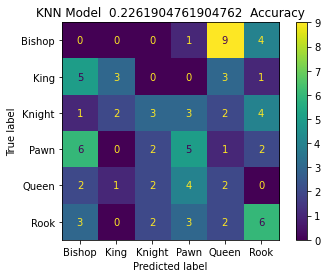

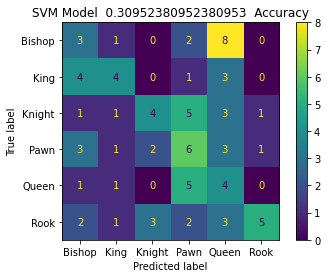

In [48]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_svm = confusion_matrix(y_test, featureTs_SVM)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=clf_svm.classes_)

cm_knn = confusion_matrix(y_test, featureTs_KNN)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=clf_knn.classes_)


disp_knn.plot()
disp_knn.ax_.set_title('KNN Model  '+str(score_knn)+'  Accuracy')

disp_svm.plot()
disp_svm.ax_.set_title('SVM Model  '+str(score_svm)+'  Accuracy')

plt.show()